In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [69]:
dataset = pd.read_csv("Ice_cream_sellings.csv")

In [98]:
dataset.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [71]:
dataset.isnull().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

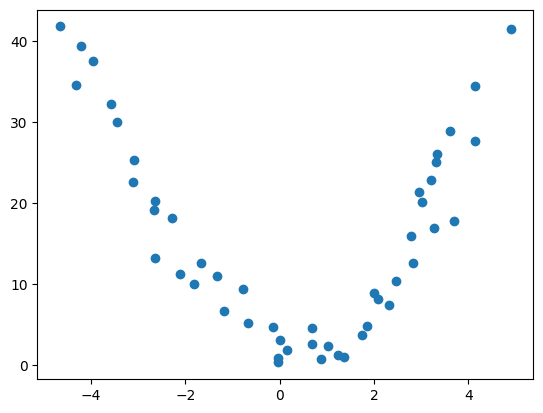

In [87]:
plt.scatter(dataset["Temperature (°C)"] , dataset["Ice Cream Sales (units)"])
plt.show()

In [73]:
# from the graph we can see that the data is not linear , and it is polynomial

In [74]:
# lets split the input and output:
x_input = dataset[["Temperature (°C)"]]
y_output = dataset[["Ice Cream Sales (units)"]]

In [86]:

from sklearn.preprocessing import PolynomialFeatures # to implement polynomial equation training

In [76]:
pf = PolynomialFeatures(degree=2)

In [77]:
pf.fit(x_input)

PolynomialFeatures()

In [78]:
x_input = pf.transform(x_input)

In [79]:
# now lets split the train data and test data:
x_train,x_test,y_train,y_test = train_test_split(x_input,y_output,test_size=0.2,random_state=42)

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lr = LinearRegression()

In [84]:
#training
lr.fit(x_train,y_train)

LinearRegression()

In [85]:
#checking accuracy
lr.score(x_test,y_test)*100

84.3055137193884

In [93]:
prediction = lr.predict(x_input)

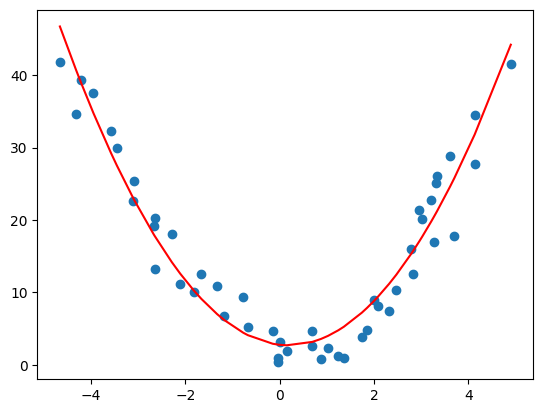

In [96]:
# lets plot the prediction graph
plt.scatter(dataset["Temperature (°C)"] , dataset["Ice Cream Sales (units)"])
plt.plot(dataset["Temperature (°C)"],prediction,c="red") # red line is prediction line
plt.show()

In [105]:
# lets predict the sales of icecream based on the temprature:
# for that we first have to transform the input into a polynomial data

In [122]:
test = pf.transform([[-4.2]])
test

C:\Users\santo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[ 1.  , -4.2 , 17.64]])

In [123]:
lr.predict(test)

array([[38.74766675]])

In [109]:
# therefore at temprature -4.2 38.74 units of icecream can be sold